## BUSINESS UNDERSTANDING


### PROBLEM STATEMENT
In Tanzania, water wells become non-functional due to various factors such as quantity of water available in the wells, the source of the water feeding the well and their management among others. Identifying non-functional wells will help prioritize maintenance efforts and improve water infrastructure planning. This analysis aims to develop a machine learning classifier that predicts the condition of water wells based on features like water point type, construction year, and other factors. The model will categorize wells as functional or non-functional.

### BUSINESS OBJECTIVES
1. Develop a classification model to predict whether a well is functional or non-functional using historical data.  
2. Implement and compare multiple algorithms to identify the most effective model for well functionality prediction.  
3. Improve prediction accuracy through feature selection, hyperparameter tuning, and handling class imbalances.

### BUSINESS QUESTIONS
This exploratory part of this analysis aims to answer the following questions:
1. What factors contribute most to well failures?
2. Which regions have the highest concentration of non-functional wells?
3. How does the construction year affect well failure rates?

### SUCCESS CRITERIA
1. A highly accurate and reliable model that effectively classifies water wells as functional or non-functional, ensuring strong performance in accuracy, recall, and F1-score.
2. Identification of high-risk regions in Tanzania where wells require more attention and maintenance efforts.
3. Understanding the impact of construction year on well functionality to support strategic planning and scheduling of maintenance based on well age.
4. Identifying features that highly impact well functionality for strategic allocation of resources during future constructions.


### What about this problem makes it a candidate for Machine Learning?
- This dataset includes both categorical and numerical variables. ML models can naturally handle both with minimal preprocessing while regression models are best suited for continuous data
- If the dataset has more functional than non-functional wells, ML models can be adjusted to account for this, whereas standard regression models might struggle with imbalanced data, leading to biased predictions toward the majority class unless special techniques like weighting or resampling are applied.
- The goal is not just to analyze existing wells but to predict the functionality of future wells, making ML a great choice, whereas traditional regression models focus more on explaining relationships between variables rather than making highly accurate classifications.
- Since we have a dataset with known well statuses, we can train a model to find patterns and make accurate predictions, whereas regression models might miss complex, non-linear relationships that tree-based or ensemble ML models can easily capture.

## DATA UNDERSTANDING

### SOURCE AND BRIEF DESCRIPTION
The source of the data sets used in this analysis are from http://taarifa.org/ and http://maji.go.tz/. They contain attributes pertaining to water points supplying clean and potable water across Tanzania. The data was split into three - training set values, test set values and training set labels - for the purpose of an online competition. For the scope of this analysis, the training set and its labels will be merged into a single dataset, allowing for greater control over the direction of the investigation. The test data will not be used as its values for the status of well are missing.

### CONDITION OF THE DATA
Loading the data before checking its condition:

In [2]:
# Importing libraries
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the datasets
label_df = pd.read_csv('0bf8bc6e-30d0-4c50-956a-603fc693d966.csv')
test_df = pd.read_csv('702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv')
train_df = pd.read_csv('4910797b-ee55-40a7-8668-10efd5c1b960.csv')

In [4]:
label_df.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [5]:
label_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.3+ KB


In [6]:
label_df.describe()

,id
count,59400.000000
mean,37115.131768
std,21453.128371
min,0.000000
25%,18519.750000
50%,37061.500000
75%,55656.500000
max,74247.000000


In [7]:
label_df.shape

(59400, 2)

In [8]:
test_df.shape

(14850, 40)

In [9]:
train_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [11]:
train_df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [12]:
train_df.shape

(59400, 40)

In [13]:
train_df.columns


Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

From the above, there is uniformity in the three data sets in that all have 40 columns. The columns in train_df are similar to those in test_df. Promising features that could contribute to answering our business questions include 'construction_year','extraction_type','management','water_quality' and 'quantity'. From the shapes, the initial dataset was split using the ratio 80%:20%

## DATA PREPARATION

### MERGING
We shall start by merging the train_df with its corresponding labels. This way, when we drop rows with null values, the corresponding labels will also be removed, ensuring that our data and labels remain aligned.

In [14]:
# Merging the train_df and label datasets
train_df = pd.merge(train_df, label_df, on='id')
train_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


### DATA CLEANING

In [15]:
# From the data head, we spot some redundant columns i.e quantity and quantity group, source and source_type, waterpoint type and waterpoint type group
# To investigate this, let us narrow them down into their own dataframe
redundant_cols = ['region', 'region_code', 'district_code', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group',
                   'payment', 'payment_type','water_quality', 'quality_group', 'quantity', 'quantity_group', 'source',
                   'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group','scheme_management', 'scheme_name']
redundant_cols_df = train_df[redundant_cols]
redundant_cols_df.head(20)

,region,region_code,district_code,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,...,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,scheme_management,scheme_name
0,Iringa,11,5,gravity,gravity,gravity,vwc,user-group,pay annually,annually,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,VWC,Roman
1,Mara,20,2,gravity,gravity,gravity,wug,user-group,never pay,never pay,...,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,Other,NaN
2,Manyara,21,4,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,...,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,VWC,Nyumba ya mungu pipe scheme
3,Mtwara,90,63,submersible,submersible,submersible,vwc,user-group,never pay,never pay,...,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,VWC,NaN
4,Kagera,18,1,gravity,gravity,gravity,other,other,never pay,never pay,...,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,NaN,NaN
5,Tanga,4,8,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,...,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,VWC,Zingibali
6,Shinyanga,17,3,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,...,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,VWC,NaN
7,Shinyanga,17,3,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,...,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,NaN,NaN
8,Tabora,14,6,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,...,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,VWC,NaN
9,Kagera,18,1,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,...,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,NaN,NaN


From the above, we can tell that the columns are giving pretty much the same information. Let us solidify this futher by checking the correlation between the columns

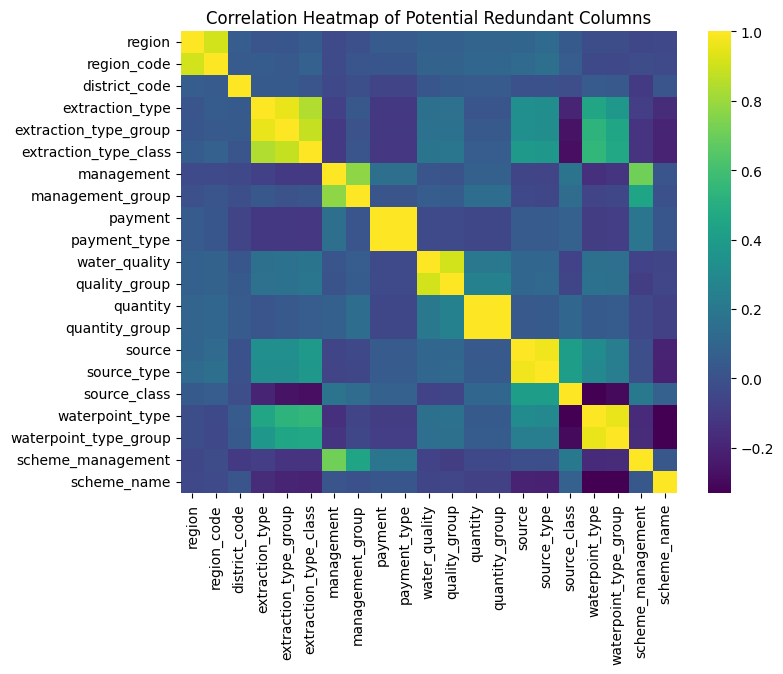

In [16]:
# Plotting a heat map
plt.figure(figsize=(8,6))
sns.heatmap(train_df[redundant_cols].apply(lambda x: pd.factorize(x)[0]).corr(), annot=False, cmap="viridis")
plt.title("Correlation Heatmap of Potential Redundant Columns")
plt.show()

From the above, we can clearly tell that the suspected columns are very highly correlated with each other. We will therefore drop one of each column.

In [17]:
# Dropping duplicated columns
train_df.drop(columns=['region_code', 'district_code', 'extraction_type_group', 'extraction_type_class', 'management', 'payment', 'quality_group',
                        'quantity_group', 'source_type', 'source_class', 'waterpoint_type_group'], inplace=True)

In [18]:
# Majority of the data in the num_private column is 0.
train_df['num_private'].value_counts()


,count
num_private,
0,58643
6,81
1,73
5,46
8,46
...,...
60,1
111,1
300,1


In [19]:
# As a result, we will drop this column
train_df.drop(columns='num_private', inplace=True)

In [20]:
train_df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'basin', 'subvillage',
       'region', 'lga', 'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'management_group', 'payment_type', 'water_quality',
       'quantity', 'source', 'waterpoint_type', 'status_group'],
      dtype='object')

In [21]:
# Dropping columns that will not contribute to this analysis
train_df.drop(columns=['id', 'date_recorded', 'gps_height', 'wpt_name', 'recorded_by'], inplace=True)

In [22]:
train_df.shape

(59400, 24)

In [23]:
# Checking for missing values
train_df.isnull().sum()

,0
amount_tsh,0
funder,3637
installer,3655
longitude,0
latitude,0
basin,0
subvillage,371
region,0
lga,0
ward,0


In [27]:
# Printing unique values for each column
for column in train_df.columns:
    print(f"--- Value Counts for {column} ---")
    print(train_df[column].value_counts(dropna=False))
    print("\n")

--- Value Counts for amount_tsh ---
amount_tsh
0.00        41639
500.00       3102
50.00        2472
1000.00      1488
20.00        1463
            ...  
38000.00        1
0.25            1
12.00           1
60000.00        1
59.00           1
Name: count, Length: 98, dtype: int64


--- Value Counts for funder ---
funder
Government Of Tanzania    9084
NaN                       3637
Danida                    3114
Hesawa                    2202
Rwssp                     1374
                          ... 
Ccps                         1
Hdv                          1
Getekwe                      1
Wilson                       1
Shamte Said                  1
Name: count, Length: 1897, dtype: int64


--- Value Counts for installer ---
installer
DWE                     17402
NaN                      3655
Government               1825
RWE                      1206
Commu                    1060
                        ...  
Rilayo water project        1
Sent Tho                    1
UPM     

From the above, aside from null values we can see that some columns have 'unknown' values and 'other' values. For all of these cases, we shall call these values 'unknown' for uniformity.

In [ ]:
# Replacing the values known as 'other' with 'Unknown'
train_df['scheme_name'].replace('other', 'unknown', inplace=True)
train_df['scheme_management'].replace('other', 'unknown', inplace=True)
train_df['extraction_type'].replace('other', 'unknown', inplace=True)
train_df['management_group'].replace('other', 'unknown', inplace=True)
train_df['payment_type'].replace('other', 'unknown', inplace=True)
train_df['source'].replace('other', 'unknown', inplace=True)
train_df['waterpoint_type'].replace('other', 'unknown', inplace=True)

In [ ]:
# Inspecting 'funder' column
train_df['funder'].value_counts().head(10)

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Name: funder, dtype: int64

In [ ]:
# Inspecting 'installer' column
train_df['installer'].value_counts().head(10)

DWE                   17402
Government             1825
RWE                    1206
Commu                  1060
DANIDA                 1050
KKKT                    898
Hesawa                  840
0                       777
TCRS                    707
Central government      622
Name: installer, dtype: int64

In [ ]:
# Since we cannot predict unknown values for 'funder' and 'installer' column, we will fill them with 'Unknown'
train_df['funder'].fillna('Unknown', inplace=True)
train_df['installer'].fillna('Unknown', inplace=True)
train_df.isnull().sum()

amount_tsh               0
funder                   0
installer                0
longitude                0
latitude                 0
basin                    0
subvillage             371
region                   0
lga                      0
ward                     0
population               0
public_meeting        3334
scheme_management     3877
scheme_name          28166
permit                3056
construction_year        0
extraction_type          0
management_group         0
payment_type             0
water_quality            0
quantity                 0
source                   0
waterpoint_type          0
status_group             0
dtype: int64

In [ ]:
# Inspecting 'subvillage' column
train_df['subvillage'].value_counts()

Madukani         508
Shuleni          506
Majengo          502
Kati             373
Mtakuja          262
                ... 
Njia Tatu          1
Chini Dukani       1
Mabwe Matitu       1
Machinjiono        1
Ishingiasha B      1
Name: subvillage, Length: 19287, dtype: int64

From the above, there is no subvillage that stands out as an outlier. Therefore, we cannot make any meaningful assumptions. This means that we have to drop the missing values.There is also a subvillage that has a value of 'M', which appears to be an anomaly. However, the frequency of its occurrence suggests that it may actually represent a legitimate subvillage, thus we will not remove it.

In [ ]:
# Dropping null values
train_df = train_df.dropna(subset=['subvillage'])

In [ ]:
# Inpecting the 'population' column
train_df['population'].value_counts()

0       21020
1        7024
200      1940
150      1892
250      1681
        ...  
3241        1
1960        1
1685        1
2248        1
1439        1
Name: population, Length: 1049, dtype: int64

We can see that a third of the data is zero for population. Since it does not contribute much to this analysis, we will drop this column.

In [ ]:
# Dropping the 'population' column
train_df.drop(columns='population', inplace=True)

In [ ]:
# Inspecting 'public_meeting' column
train_df['public_meeting'].value_counts()

True     50642
False     5054
Name: public_meeting, dtype: int64

In [ ]:
# 'public_meeting' is a boolean column heavily dominated by True. Since we can not accurately predict unknown values, we will drop the missing values
train_df = train_df.dropna(subset=['public_meeting'])

In [ ]:
# Inspecting 'scheme_management' column
train_df['scheme_management'].value_counts()

VWC                 35207
WUG                  4392
Water authority      3124
WUA                  2862
Water Board          2709
Parastatal           1468
Company              1057
Private operator      817
Other                 434
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [ ]:
# Inspecting 'scheme_name' column
train_df['scheme_name'].value_counts()

K                       676
None                    643
Borehole                546
Chalinze wate           404
M                       345
                       ... 
villagers                 1
BL Siha Sec               1
Mafuriko Water Suppl      1
Wisi                      1
Mlima wa Nyasho           1
Name: scheme_name, Length: 2617, dtype: int64

In [ ]:
# Since we cannot predict unknown values for 'scheme_name' and 'scheme_management' column, we will fill them with 'Unknown'
train_df['scheme_name'].fillna('unknown', inplace=True)
train_df['scheme_management'].fillna('unknown', inplace=True)
train_df.isnull().sum()

amount_tsh              0
funder                  0
installer               0
longitude               0
latitude                0
basin                   0
subvillage              0
region                  0
lga                     0
ward                    0
public_meeting          0
scheme_management       0
scheme_name             0
permit               2785
construction_year       0
extraction_type         0
management_group        0
payment_type            0
water_quality           0
quantity                0
source                  0
waterpoint_type         0
status_group            0
dtype: int64

In [ ]:
# Inspecting 'permit' column
train_df['permit'].value_counts()

True     36996
False    15915
Name: permit, dtype: int64

In [ ]:
# Since 'permit' is a boolean column, we can not accurately predict unknown values. Therefore, we will drop the missing values
train_df = train_df.dropna(subset=['permit'])

In [ ]:
# Inspecting 'quality' column
train_df['water_quality'].value_counts()

soft                  46013
salty                  4164
unknown                1087
milky                   733
coloured                478
salty abandoned         237
fluoride                183
fluoride abandoned       16
Name: water_quality, dtype: int64

In [ ]:
# Combining salty and salty abandoned, and fluoride and fluoride abandoned
train_df['water_quality'] = train_df['water_quality'].replace(['salty', 'salty abandoned'], 'salty')
train_df['water_quality'] = train_df['water_quality'].replace(['fluoride', 'fluoride abandoned'], 'fluoride')
train_df['water_quality'].value_counts()

soft        46013
salty        4401
unknown      1087
milky         733
coloured      478
fluoride      199
Name: water_quality, dtype: int64

In [ ]:
train_df.isnull().sum()

amount_tsh           0
funder               0
installer            0
longitude            0
latitude             0
basin                0
subvillage           0
region               0
lga                  0
ward                 0
public_meeting       0
scheme_management    0
scheme_name          0
permit               0
construction_year    0
extraction_type      0
management_group     0
payment_type         0
water_quality        0
quantity             0
source               0
waterpoint_type      0
status_group         0
dtype: int64

There are no more missing values.

In [ ]:
train_df.shape

# We lost 10% of the data by dropping the missing values while cleaning.

(52911, 23)

In [ ]:
# Checking for duplicates
train_df.duplicated().sum()

114

In [ ]:
# Listing the duplicated rows
train_df[train_df.duplicated(keep=False)]

,amount_tsh,funder,installer,longitude,latitude,basin,subvillage,region,lga,ward,...,permit,construction_year,extraction_type,management_group,payment_type,water_quality,quantity,source,waterpoint_type,status_group
168,0.0,Wvt,WVT,0.000000,-2.000000e-08,Lake Victoria,Ilula,Shinyanga,Bariadi,Chinamili,...,False,0,gravity,parastatal,unknown,soft,seasonal,rainwater harvesting,communal standpipe,functional
301,0.0,Government Of Tanzania,Government,0.000000,-2.000000e-08,Lake Victoria,Nyanza,Mwanza,Geita,Kalangalala,...,True,0,afridev,user-group,never pay,soft,insufficient,machine dbh,hand pump,functional
326,0.0,Government Of Tanzania,Government,0.000000,-2.000000e-08,Lake Victoria,Nyanza,Mwanza,Geita,Kalangalala,...,True,0,submersible,user-group,never pay,soft,insufficient,machine dbh,communal standpipe,functional
370,0.0,Government Of Tanzania,Government,0.000000,-2.000000e-08,Lake Victoria,Nyanza,Mwanza,Geita,Kalangalala,...,True,0,submersible,user-group,never pay,soft,insufficient,machine dbh,communal standpipe,functional
965,0.0,Government Of Tanzania,DWE,0.000000,-2.000000e-08,Lake Victoria,K/Center,Mwanza,Geita,Katoro,...,True,0,submersible,user-group,never pay,soft,insufficient,machine dbh,communal standpipe multiple,non functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56899,0.0,Government Of Tanzania,Government,0.000000,-2.000000e-08,Lake Victoria,Sweya,Mwanza,Geita,Kharumwa,...,True,0,ksb,user-group,unknown,unknown,dry,lake,communal standpipe,non functional
57285,0.0,Hesawa,DWE,0.000000,-2.000000e-08,Lake Tanganyika,Sozibuye,Mwanza,Geita,Busanda,...,True,0,nira/tanira,user-group,never pay,soft,insufficient,shallow well,hand pump,functional
57423,0.0,W.D & I.,RWE,37.540901,-6.959749e+00,Wami / Ruvu,Majengo,Morogoro,Mvomero,Mlali,...,True,1968,gravity,user-group,never pay,soft,enough,river,communal standpipe,non functional
57807,0.0,Government Of Tanzania,Government,0.000000,-2.000000e-08,Lake Victoria,C/Center,Mwanza,Geita,Nyachiluluma,...,True,0,ksb,user-group,never pay,unknown,dry,lake,communal standpipe multiple,non functional


From the above, we can see that the data are near duplicates and not necessarily exact duplicates. To eliminate redundancy, we shall drop the duplicated values

In [ ]:
train_df = train_df.drop_duplicates()
train_df.shape

(52797, 23)

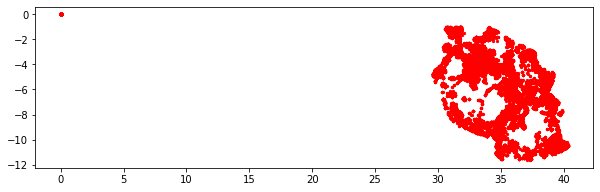

In [ ]:
# Checking for outliers in the Longitude and Latitude columns
# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(train_df, geometry=gpd.points_from_xy(train_df.longitude, train_df.latitude))
# Plot
gdf.plot(figsize=(10,6), marker='o', color='red', markersize=5)
plt.show()


We can see that there is an outlier with coordinates 0,0. We can remove this point.

In [ ]:
# Dropping columns with latitude and longitude = 0
train_df = train_df[train_df['latitude'] != 0]
train_df = train_df[train_df['longitude'] != 0]
train_df.shape

(51434, 23)

In [ ]:
# Checking for outliers in the construction year column
train_df['construction_year'].value_counts().sort_index().head()

0       16764
1960       38
1961       20
1962       28
1963       84
Name: construction_year, dtype: int64

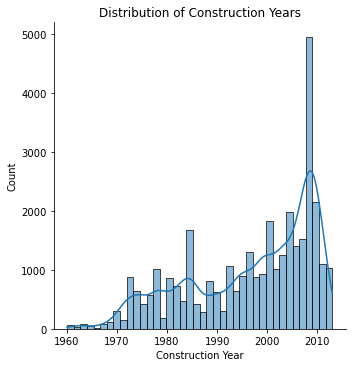

In [ ]:
# Checking on the distribution of the construction years excluding year 0
construction_year_df = train_df[train_df['construction_year'] != 0]
sns.displot(construction_year_df['construction_year'], kde=True)
plt.xlabel('Construction Year')
plt.title('Distribution of Construction Years')
plt.show()

Since almost 30% of the data in the construction_year column are 0, replacing the zero values with a single value like median or mode will significantly shift the distribution of the dataset. We shall prioritize the distribution of the data by random sampling from the non-zero values.

In [ ]:
# Filtering out non-zero construction years
non_zero_years = train_df[train_df['construction_year'] > 0]['construction_year']
# Randomly sampling replacement from non-zero construction years and replacing zero values with them
train_df.loc[train_df['construction_year'] == 0, 'construction_year'] = np.random.choice(non_zero_years, size=(train_df['construction_year'] == 0).sum(), replace=True)


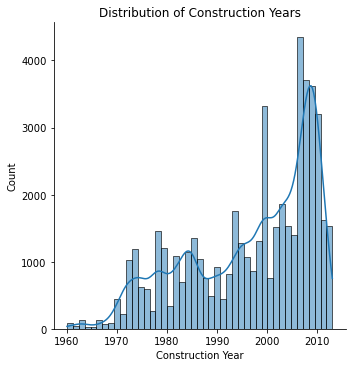

In [ ]:
# Checking on the distribution of the construction years after replacement
sns.displot(train_df['construction_year'], kde=True)
plt.xlabel('Construction Year')
plt.title('Distribution of Construction Years')
plt.show()


From the graph, we have been able to maintain the distribution of the original dataset without dropping any values.

In [ ]:
# investigating the distribution of the amount_tsh column
train_df['amount_tsh'].value_counts().sort_index()

0.0         34582
0.2             3
1.0             3
2.0            13
5.0           375
            ...  
117000.0        7
138000.0        1
170000.0        1
200000.0        1
250000.0        1
Name: amount_tsh, Length: 91, dtype: int64

The column amount_tsh has a lot of zero values, which doesnt make sense. We will replace the 0s with the mode of the entire dataset, as the mode represents what well construction usually costs.

In [ ]:
# First calculating the mode for amount_tsh excluding zeros
mode_amount_tsh = train_df[train_df['amount_tsh'] != 0]['amount_tsh'].mode()[0]
mode_count = (train_df['amount_tsh'] == mode_amount_tsh).sum()
print(f"Mode Value: {mode_amount_tsh}, Count: {mode_count}")

Mode Value: 500.0, Count: 3028


In [ ]:
# Replacing zeros with the mode
train_df['amount_tsh'] = train_df['amount_tsh'].replace(0, mode_amount_tsh)

### EXPLORATORY DATA ANALYSIS

In [ ]:
# Combining the functional and functional needs repair values in the status_group to get a binary target variable
train_df['status_group'] = train_df['status_group'].replace(['functional needs repair', 'functional'], 'functional')
train_df['status_group'].value_counts()

functional        31735
non functional    19699
Name: status_group, dtype: int64

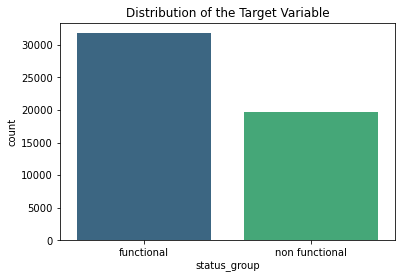

In [ ]:
# Using a bar graph, we can check the distribution of the target variable
sns.countplot(x='status_group', data=train_df, palette='viridis')
plt.title('Distribution of the Target Variable')
plt.show()


The majority of the wells are functional, with a distribution of approximately 3:2 between functional and non-functional wells.

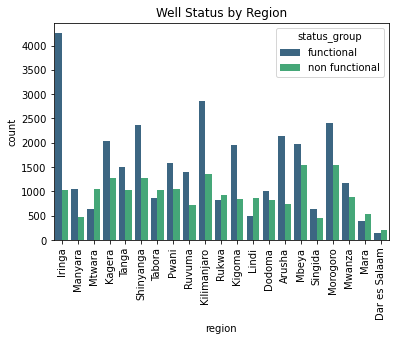

In [ ]:
# Checking the distribution of well status by  region
sns.countplot(data=train_df, x='region', hue='status_group', palette='viridis')
plt.xticks(rotation=90)
plt.title('Well Status by Region')
plt.show()


We can see that Iringa has the highest number of functioning wells followed by Kilimanjaro then Shinyanga. The highest number of non-functional wells are in Morogoro and Mbeya.

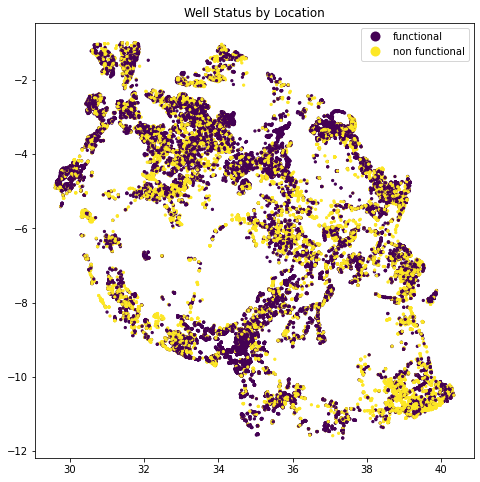

In [ ]:
# Checking the map again and adding hue for status_group
gdf = gpd.GeoDataFrame(train_df, geometry=gpd.points_from_xy(train_df.longitude, train_df.latitude))
gdf.plot(figsize=(10,8), marker='o', column='status_group', cmap='viridis', legend=True, markersize=5)
plt.title('Well Status by Location')
plt.show()

This shows the data in the shape of Tanzania!
This gdf plot visualizes the geographic distribution of functional and non-functional wells.
From it, we can observe:
- Non-functional wells are spread across the region but are more concentrated in the south eastern parts.  
- Functional wells are more densely clustered in the central and western areas.  
- Some areas show a mix of both, indicating varied well conditions within certain regions.  
The higher concentration of non-functional wells in the south east of Tanzania could indicate challenges such as poor maintenance, aged infrastructure, or unreliable sources of water feeding the wells.

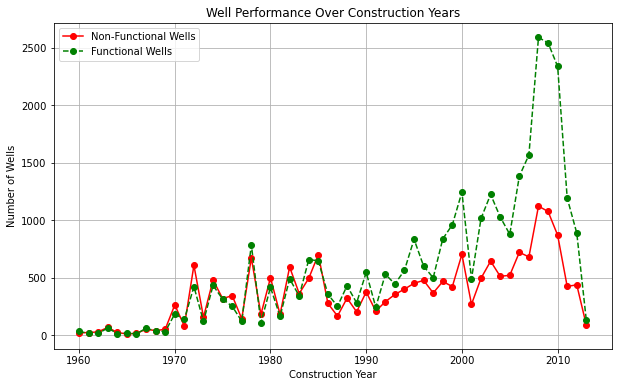

In [ ]:
# Checking the trend of well performance over time
# Filter by status group
non_functional_wells_per_year = train_df[train_df['status_group'] == 'non functional'].groupby('construction_year').size()
functional_wells_per_year = train_df[train_df['status_group'] == 'functional'].groupby('construction_year').size()

# Plotting a line graph
plt.figure(figsize=(10,6))
plt.plot(non_functional_wells_per_year.index, non_functional_wells_per_year.values, marker='o', linestyle='-', color='red', label='Non-Functional Wells')
plt.plot(functional_wells_per_year.index, functional_wells_per_year.values, marker='o', linestyle='--', color='green', label='Functional Wells')
plt.xlabel('Construction Year')
plt.ylabel('Number of Wells')
plt.title('Well Performance Over Construction Years')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()



The plot shows an increasing trend in well construction, peaking around 2010, with functional wells consistently outnumbering non-functional ones.
However, older wells tend to have a higher proportion of non-functional status, possibly due to aging infrastructure or lack of maintenance.
More recent wells are more likely to be functional, suggesting improvements in construction quality, materials, and maintenance programs.
However, the presence of non-functional wells in all time periods highlights that factors beyond age also play a role in well performance.

## PRE-PROCESSING

For this section, we shall first split the data then apply the pre-processing on both the training and testing data sets

### ENCODING AND TRANSFORMING

In [ ]:
from sklearn.model_selection import train_test_split

# Defining features (X) and target (y)
X = train_df.drop(columns=['status_group'])
y = train_df['status_group']

# Split into training and test sets (80% train, 20% test). Stratify by y keeps the distribution of y in both sets the same
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Creating a copy of the data sets
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

In [ ]:
# Creating a dataframe with the numeric cols and the categorical columns
number_columns = X_train_encoded.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X_train_encoded.select_dtypes(exclude=np.number).columns.tolist()

print("Categorical columns:", categorical_cols)
print("Number columns:", number_columns)

Categorical columns: ['funder', 'installer', 'basin', 'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'scheme_management', 'scheme_name', 'permit', 'extraction_type', 'management_group', 'payment_type', 'water_quality', 'quantity', 'source', 'waterpoint_type']
Number columns: ['amount_tsh', 'longitude', 'latitude', 'construction_year']


In [ ]:
# Checking for unique values in each categorical column
for i in categorical_cols:
  print(f'The variable "{i}" has {X_train_encoded[i].nunique()} variables \n')

The variable "funder" has 1524 variables 

The variable "installer" has 1672 variables 

The variable "basin" has 9 variables 

The variable "subvillage" has 15246 variables 

The variable "region" has 21 variables 

The variable "lga" has 119 variables 

The variable "ward" has 1897 variables 

The variable "public_meeting" has 2 variables 

The variable "scheme_management" has 13 variables 

The variable "scheme_name" has 2413 variables 

The variable "permit" has 2 variables 

The variable "extraction_type" has 18 variables 

The variable "management_group" has 4 variables 

The variable "payment_type" has 6 variables 

The variable "water_quality" has 6 variables 

The variable "quantity" has 5 variables 

The variable "source" has 9 variables 

The variable "waterpoint_type" has 7 variables 



In [ ]:
# Dropping columns due to high cardinality
X_train_encoded.drop(columns=['funder', 'installer', 'subvillage', 'lga', 'ward', 'scheme_name'], inplace=True)
X_test_encoded.drop(columns=['funder', 'installer', 'subvillage', 'lga', 'ward', 'scheme_name'], inplace=True)

In [ ]:
# Re-defining categorical columns
categorical_cols = X_train_encoded.select_dtypes(exclude=np.number).columns.tolist()

In [ ]:
for i in categorical_cols:
  print(f'The variable "{i}" has {X_train_encoded[i].nunique()} variables: {X_train_encoded[i].unique()} \n')

The variable "basin" has 9 variables: ['Internal' 'Rufiji' 'Ruvuma / Southern Coast' 'Pangani' 'Lake Rukwa'
 'Wami / Ruvu' 'Lake Victoria' 'Lake Nyasa' 'Lake Tanganyika'] 

The variable "region" has 21 variables: ['Manyara' 'Iringa' 'Ruvuma' 'Tanga' 'Rukwa' 'Morogoro' 'Kagera'
 'Kilimanjaro' 'Mara' 'Shinyanga' 'Lindi' 'Mbeya' 'Kigoma' 'Mtwara'
 'Pwani' 'Singida' 'Arusha' 'Dodoma' 'Tabora' 'Mwanza' 'Dar es Salaam'] 

The variable "public_meeting" has 2 variables: [True False] 

The variable "scheme_management" has 13 variables: ['unknown' 'VWC' 'Water Board' 'Parastatal' 'WUG' 'Water authority'
 'Company' 'Private operator' 'WUA' 'Other' 'SWC' 'Trust' 'None'] 

The variable "permit" has 2 variables: [True False] 

The variable "extraction_type" has 18 variables: ['gravity' 'swn 80' 'india mark ii' 'ksb' 'unknown' 'walimi' 'nira/tanira'
 'submersible' 'mono' 'windmill' 'climax' 'afridev' 'india mark iii'
 'other - rope pump' 'other - swn 81' 'cemo' 'other - play pump'
 'other - mkulima/s

Encoding the categorical variables using one-hot, ordinal and label encoding.

In [ ]:
# Using One Hot Encoding for low cardinality nominal data
from sklearn.preprocessing import OneHotEncoder

ohe_cols = ['public_meeting', 'permit', 'payment_type', 'quantity', 'source', 'waterpoint_type', 'management_group']

# Initialize OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse=False)

# Fit on training data and transform both train & test
encoded_ohe_train = ohe.fit_transform(X_train_encoded[ohe_cols])
encoded_ohe_test = ohe.transform(X_test_encoded[ohe_cols])

# Convert to DataFrame and set correct column names
encoded_ohe_train_df = pd.DataFrame(encoded_ohe_train, columns=ohe.get_feature_names_out(ohe_cols), index=X_train_encoded.index)
encoded_ohe_test_df = pd.DataFrame(encoded_ohe_test, columns=ohe.get_feature_names_out(ohe_cols), index=X_test_encoded.index)

# Drop original categorical columns
X_train_encoded.drop(columns=ohe_cols, inplace=True)
X_test_encoded.drop(columns=ohe_cols, inplace=True)

# Concatenation the new encoded columns
X_train_encoded = pd.concat([X_train_encoded, encoded_ohe_train_df], axis=1)
X_test_encoded = pd.concat([X_test_encoded, encoded_ohe_test_df], axis=1)


In [ ]:
# Using Ordinal Encoding for ordered categories
from sklearn.preprocessing import OrdinalEncoder

ordinal_cols = ['water_quality']
quality_order = [['soft', 'milky', 'salty', 'coloured', 'fluoride', 'unknown']]

# Initializing the encoder
ordinal_enc = OrdinalEncoder(categories=quality_order)

# Transform both train and test data
X_train_encoded[ordinal_cols] = ordinal_enc.fit_transform(X_train_encoded[ordinal_cols])
X_test_encoded[ordinal_cols] = ordinal_enc.transform(X_test_encoded[ordinal_cols])  # Use transform, NOT fit_transform

# Ensure dtype is preserved (as OrdinalEncoder returns float by default)
X_train_encoded[ordinal_cols] = X_train_encoded[ordinal_cols].astype(int)
X_test_encoded[ordinal_cols] = X_test_encoded[ordinal_cols].astype(int)

In [ ]:
# Using Label Encoding for high cardinality nominal data
from sklearn.preprocessing import LabelEncoder

label_cols = ['region', 'scheme_management', 'extraction_type', 'basin']
le = LabelEncoder()

for col in label_cols:
    X_train_encoded[col] = le.fit_transform(X_train_encoded[col])
    X_test_encoded[col] = le.transform(X_test_encoded[col])

In [ ]:
# Reindex the test set to match the train set
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

In [ ]:
# Using ordinal encoding for the target variable
# Defining the order of categories
status_order = [['non functional', 'functional']]

# Initializing OrdinalEncoder
ordinal_enc_target = OrdinalEncoder(categories=status_order)

# Fitting and transforming the train and test target variable using numpy to reshape the data before encoding
y_train_transformed = ordinal_enc_target.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_test_transformed = ordinal_enc_target.transform(y_test.to_numpy().reshape(-1, 1))

# Convert back to a 1D array
y_train_transformed = y_train_transformed.ravel()
y_test_transformed = y_test_transformed.ravel()


### SCALING

In [ ]:
# Creating a copy of the data
X_train_transformed = X_train_encoded.copy()
X_test_transformed = X_test_encoded.copy()

In [ ]:
X_train_encoded[number_columns]


,amount_tsh,longitude,latitude,construction_year
40554,500.0,35.371668,-4.263098,2002
25171,500.0,34.912992,-8.954426,2006
28622,200.0,36.084544,-10.921422,2000
35113,30.0,38.286935,-5.778625,1970
23503,500.0,32.107949,-8.912064,1984
...,...,...,...,...
29444,33.0,37.450929,-3.495127,2008
46519,500.0,36.778837,-2.556306,2012
55239,500.0,34.700531,-9.107210,1974
7511,500.0,34.433609,-9.299510,1967


In [ ]:
# Checking for skewness in the numerical columns
for i, col in enumerate(number_columns):
    print(f"Column: {col}, Skewness: {X_train_transformed[col].skew():.2f}")

Column: amount_tsh, Skewness: 38.58
Column: longitude, Skewness: -0.18
Column: latitude, Skewness: -0.26
Column: construction_year, Skewness: -0.70


For the amount_tsh column, we shall compare various scalers to see which one best corrects this heavily right skewed column.

Original Skewness: 38.58122532115044
Square Root Skewness: 6.7560753882906575
Cube Root Skewness: 2.406337295410395
Box-Cox Skewness: 0.3271753766434505 (Lambda: 0.19402421454632152)
Log Skewness: -1.4375502939355969


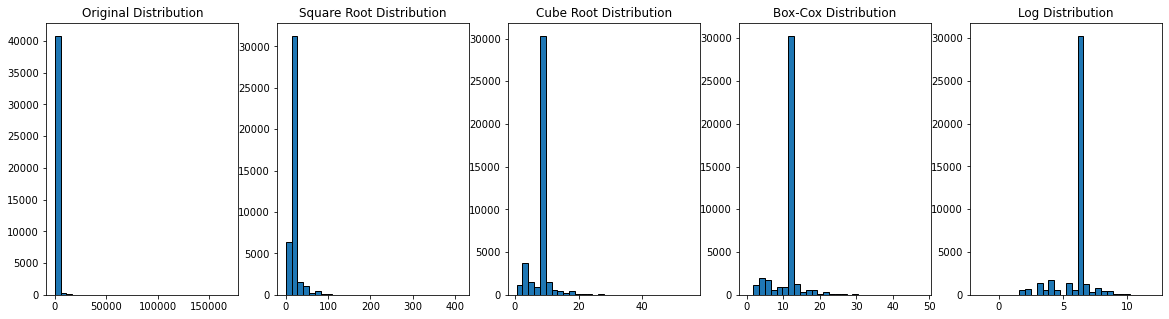

In [ ]:
import scipy.stats as stats

# Assuming 'amount_tsh' is in df
df = X_train_transformed.copy()

# Function to calculate skewness
def check_skewness(col):
    return stats.skew(df[col])

# Original skewness
original_skew = check_skewness('amount_tsh')

# Square root transformation
df['amount_tsh_sqrt'] = np.sqrt(df['amount_tsh'])
sqrt_skew = check_skewness('amount_tsh_sqrt')

# Cube root transformation
df['amount_tsh_cbrt'] = np.cbrt(df['amount_tsh'])
cbrt_skew = check_skewness('amount_tsh_cbrt')

# Box-Cox transformation
df['amount_tsh_boxcox'], lambda_boxcox = stats.boxcox(df['amount_tsh'] + 1)
boxcox_skew = check_skewness('amount_tsh_boxcox')

# Log transformation
df['amount_tsh_log'] = np.log(df['amount_tsh'])
log_skew = check_skewness('amount_tsh_log')

# Print skewness values
print(f'Original Skewness: {original_skew}')
print(f'Square Root Skewness: {sqrt_skew}')
print(f'Cube Root Skewness: {cbrt_skew}')
print(f'Box-Cox Skewness: {boxcox_skew} (Lambda: {lambda_boxcox})')
print(f'Log Skewness: {log_skew}')

# Plot histograms to visualize
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

for ax, col, title in zip(
    axes,
    ['amount_tsh', 'amount_tsh_sqrt', 'amount_tsh_cbrt', 'amount_tsh_boxcox', 'amount_tsh_log'],
    ['Original', 'Square Root', 'Cube Root', 'Box-Cox', 'Log']
):
    ax.hist(df[col], bins=30, edgecolor='black')
    ax.set_title(f'{title} Distribution')

plt.show()


From the above, we can see that box-cox corrects the data the best. Therefore we shall proceed with this.

In [ ]:
# Apply Box-Cox transformation on training set and capture the lambda value
X_train_transformed['amount_tsh_boxcox'], lambda_boxcox = stats.boxcox(X_train_transformed['amount_tsh'] + 1)
boxcox_skew = check_skewness('amount_tsh_boxcox')

# Drop the original 'amount_tsh' column
X_train_transformed.drop('amount_tsh', axis=1, inplace=True)

print(f'Box-Cox Skewness: {boxcox_skew} (Lambda: {lambda_boxcox})')

Box-Cox Skewness: 0.3271753766434505 (Lambda: 0.19402421454632152)


In [ ]:
# Apply the same lambda to the test set
X_test_transformed['amount_tsh_boxcox'] = stats.boxcox(X_test_transformed['amount_tsh'] + 1, lmbda=lambda_boxcox)
boxcox_skew = check_skewness('amount_tsh_boxcox')

# Drop the original 'amount_tsh' column
X_test_transformed.drop('amount_tsh', axis=1, inplace=True)

print(f'Box-Cox Skewness: {boxcox_skew} (Lambda: {lambda_boxcox})')

Box-Cox Skewness: 0.3271753766434505 (Lambda: 0.19402421454632152)


In [ ]:
# Transforming construction_year using apply min-max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_transformed[['construction_year']] = scaler.fit_transform(X_train_transformed[['construction_year']])
X_test_transformed[['construction_year']] = scaler.transform(X_test_transformed[['construction_year']])

From the above, we can see that all our numerical columns are within -1 to 1 range. This indicates that the data is approximately symmetric to moderately skewed.

In [ ]:
# Checking that we have consistency in columns in the train and test sets
X_train_transformed.columns == X_test_transformed.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
X_train_transformed

,longitude,latitude,basin,region,scheme_management,construction_year,extraction_type,water_quality,public_meeting_True,permit_True,...,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_unknown,management_group_parastatal,management_group_unknown,management_group_user-group,amount_tsh_boxcox
40554,35.371668,-4.263098,0,8,12,0.792453,3,0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,12.063816
25171,34.912992,-8.954426,6,3,7,0.867925,3,0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.063816
28622,36.084544,-10.921422,7,16,7,0.754717,14,0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,9.267818
35113,38.286935,-5.778625,5,20,7,0.188679,3,0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.880703
23503,32.107949,-8.912064,2,15,7,0.452830,4,0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,12.063816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29444,37.450929,-3.495127,5,6,10,0.905660,13,0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.062173
46519,36.778837,-2.556306,0,0,3,0.981132,3,0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,12.063816
55239,34.700531,-9.107210,6,3,8,0.264151,3,0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.063816
7511,34.433609,-9.299510,1,3,7,0.132075,3,0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.063816


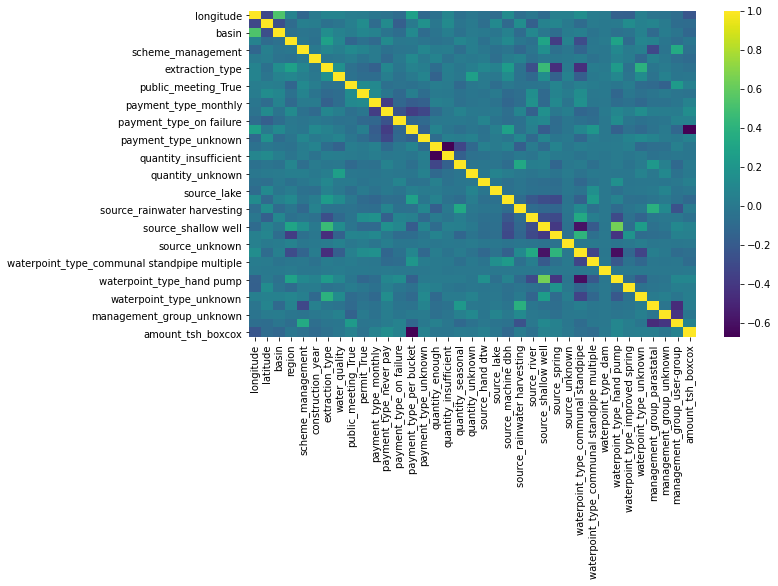

In [ ]:
# Checking if we have any highly correlated features
corr = X_train_transformed.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=False, cmap="viridis")
plt.show()

We can see that we do not have any highly correlated columns.

Using linear regression on the transformed data and feature importance to determine which features highly influence functionality of the wells.

In [ ]:
from sklearn.linear_model import LinearRegression

X = X_train_transformed
y = y_train_transformed

# Train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get feature importance (absolute coefficient values)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': np.abs(model.coef_)  # Take absolute value
}).sort_values(by='Coefficient', ascending=False)

# Display the most important features
print(feature_importance)

                                        Feature  Coefficient
15                              quantity_enough     0.588034
17                            quantity_seasonal     0.534650
16                        quantity_insufficient     0.482819
29                          waterpoint_type_dam     0.481742
32                      waterpoint_type_unknown     0.373921
26                               source_unknown     0.324068
22                  source_rainwater harvesting     0.306886
28  waterpoint_type_communal standpipe multiple     0.212891
25                                source_spring     0.199559
18                             quantity_unknown     0.192540
5                             construction_year     0.191738
23                                 source_river     0.184711
24                          source_shallow well     0.168243
11                       payment_type_never pay     0.163129
34                     management_group_unknown     0.129540
14                      

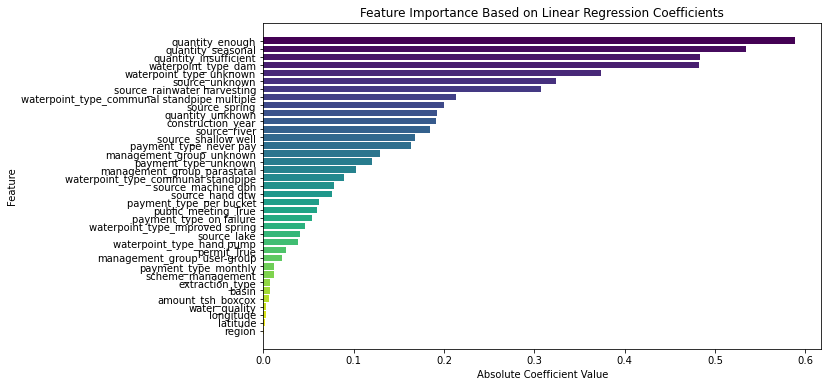

In [ ]:
# Visualising these results
# Create color mapping using viridis
colors = plt.cm.viridis(np.linspace(0, 1, len(feature_importance)))

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color=colors)
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance Based on Linear Regression Coefficients')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()



From the above, we can see that 'quantity', 'waterpoint_type', 'source', 'construction_year', 'payment_type' and 'management_group' are the leading indicators of the functionality of a well.
       

## CLASSIFICATION MODELING

We shall model using Logistic Regression, Random Forest, K-NN and Decision Trees. We shall then apply tuning to see whether we can improve the models further. For each model we shall use accuracy, recall, precision and F-beta score as evaluation metrics and we shall round each off to 4 decimal places for uniformity. Comparison of the models and evaluation shall be done at the Evaluation step.

### LOGISTIC REGRESSION

We shall use Logistic regression as our base model.

Model 1 - LogReg:
Accuracy: 0.7554
Recall: 0.8133
Precision: 0.7950
F1-score: 0.8040
              precision    recall  f1-score   support

         0.0       0.69      0.66      0.67      3940
         1.0       0.80      0.81      0.80      6347

    accuracy                           0.76     10287
   macro avg       0.74      0.74      0.74     10287
weighted avg       0.75      0.76      0.75     10287



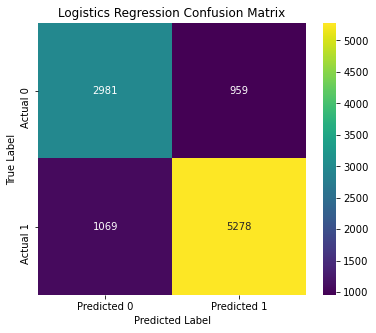

In [ ]:
# Importing logistic regression and metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix

# Initializing and training the logistic regression model
logreg_model = LogisticRegression(class_weight='balanced', random_state=42)
logreg_model.fit(X_train_transformed, y_train_transformed)

# Making predictions on the test set
y_pred_logreg = logreg_model.predict(X_test_transformed)

# Evaluating the model
accuracy_logreg = accuracy_score(y_test_transformed, y_pred_logreg)
recall_logreg = recall_score(y_test_transformed, y_pred_logreg)
precision_logreg = precision_score(y_test_transformed, y_pred_logreg)
f1_logreg = f1_score(y_test_transformed, y_pred_logreg)

print('Model 1 - LogReg:')
print(f"Accuracy: {accuracy_logreg:.4f}")
print(f"Recall: {recall_logreg:.4f}")
print(f"Precision: {precision_logreg:.4f}")
print(f"F1-score: {f1_logreg:.4f}")

# Classification report
print(classification_report(y_test_transformed, y_pred_logreg))

# Computing confusion matrix
cm = confusion_matrix(y_test_transformed, y_pred_logreg)
plt.figure(figsize=(6,5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='viridis',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Logistics Regression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Let us explore using RFE here because it helps eliminate irrelevant features, reducing noise and improving model performance by selecting only the most important predictors. This will highlight the top 10 features in the models, which is helpful information for this analysis.

Model 2 - LogReg with RFE:
Accuracy: 0.7579
Recall: 0.8714
Precision: 0.7677
F1-score: 0.8163

Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      0.58      0.65      3940
         1.0       0.77      0.87      0.82      6347

    accuracy                           0.76     10287
   macro avg       0.75      0.72      0.73     10287
weighted avg       0.76      0.76      0.75     10287



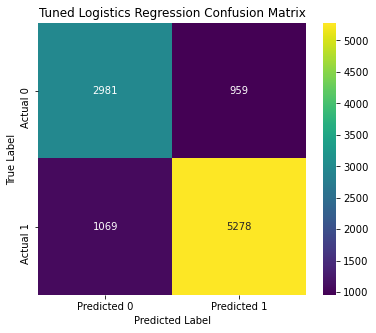


Selected Features after RFE:
 Index(['construction_year', 'quantity_enough', 'quantity_insufficient',
       'quantity_seasonal', 'quantity_unknown', 'source_lake',
       'source_rainwater harvesting',
       'waterpoint_type_communal standpipe multiple', 'waterpoint_type_dam',
       'waterpoint_type_unknown'],
      dtype='object')


In [ ]:
# Import necessary libraries
from sklearn.feature_selection import RFE

# Initialize Logistic Regression
logreg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=500)

# Apply Recursive Feature Elimination (RFE)
rfe = RFE(estimator=logreg, n_features_to_select=10)
X_train_selected = rfe.fit_transform(X_train_transformed, y_train_transformed)
X_test_selected = rfe.transform(X_test_transformed)

# Train Logistic Regression on selected features
logreg.fit(X_train_selected, y_train_transformed)

# Predictions
y_pred = logreg.predict(X_test_selected)

# Evaluation Metrics
accuracy_logreg_optm = accuracy_score(y_test_transformed, y_pred)
recall_logreg_optm = recall_score(y_test_transformed, y_pred)
precision_logreg_optm = precision_score(y_test_transformed, y_pred)
f1_logreg_optm = f1_score(y_test_transformed, y_pred)

print('Model 2 - LogReg with RFE:')
print(f"Accuracy: {accuracy_logreg_optm:.4f}")
print(f"Recall: {recall_logreg_optm:.4f}")
print(f"Precision: {precision_logreg_optm:.4f}")
print(f"F1-score: {f1_logreg_optm:.4f}")
print("\nClassification Report:\n", classification_report(y_test_transformed, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_transformed, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='viridis',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Tuned Logistics Regression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Show selected features
selected_features = X_train_transformed.columns[rfe.support_]
print("\nSelected Features after RFE:\n", selected_features)


From the above, we can see that model 2 shows an improvement in recall (from 0.8133 to 0.8714) and F1-score (from 0.8040 to 0.8163), indicating better identification of the positive class. However, this comes at the cost of slightly lower precision (from 0.7950 to 0.7677), meaning more false positives. The accuracy of both models remains similar, with model 2 showing a minor improvement (from 0.7554 to 0.7579). Since RFE helps refine feature selection and improve model performance, it is worth exploring more robust models like Random Forest, which can inherently handle feature importance and offer better generalization.

We can also note that the RFI selected 'construction_year', 'quantity','source', and 'waterpoint_type' as the most important features. This is similar to what we attained using linear regression.

### RANDOM FOREST

Model 3 - RF:
Accuracy: 0.8465
Recall: 0.8955
Precision: 0.8612
F1-score: 0.8780

Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.77      0.79      3940
         1.0       0.86      0.90      0.88      6347

    accuracy                           0.85     10287
   macro avg       0.84      0.83      0.84     10287
weighted avg       0.85      0.85      0.85     10287



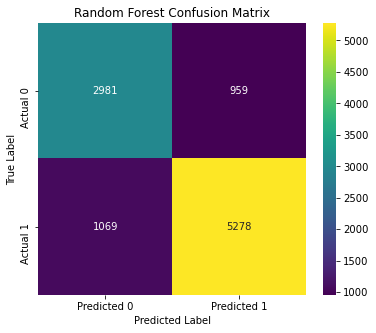

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_transformed, y_train_transformed)

# Make predictions
y_pred_rf = rf_model.predict(X_test_transformed)

# Evaluate the model
accuracy_rf = accuracy_score(y_test_transformed, y_pred_rf)
recall_rf = recall_score(y_test_transformed, y_pred_rf)
precision_rf = precision_score(y_test_transformed, y_pred_rf)
f1_rf = f1_score(y_test_transformed, y_pred_rf)

# Print results
print('Model 3 - RF:')
print(f'Accuracy: {accuracy_rf:.4f}')
print(f'Recall: {recall_rf:.4f}')
print(f'Precision: {precision_rf:.4f}')
print(f'F1-score: {f1_rf:.4f}')
print('\nClassification Report:\n', classification_report(y_test_transformed, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test_transformed, y_pred_rf)
plt.figure(figsize=(6,5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='viridis',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


We shall try improve this model using hyperparameter tuning.

In [ ]:
# Tuning the random forest model using GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid using typical ranges
param_grid = {
#     (More trees reduce variance)
    'n_estimators': [100, 200, 300],
#     (Shallower trees prevent overfitting)
    'max_depth': [10, 20, 30],
#     (Higher values prevent overfitting)
    'min_samples_split': [2, 5, 10],
#     (Higher values make trees less complex)
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train_transformed, y_train_transformed)

# Print best parameters
print('Best Parameters:', grid_search.best_params_)

# Train the best model
best_rf = grid_search.best_estimator_
y_pred_optimized = best_rf.predict(X_test_transformed)

# Evaluate the optimized model
accuracy_rf_optm = accuracy_score(y_test_transformed, y_pred_optimized)
recall_rf_optm = recall_score(y_test_transformed, y_pred_optimized)
precision_rf_optm = precision_score(y_test_transformed, y_pred_optimized)
f1_rf_optm = f1_score(y_test_transformed, y_pred_optimized)

print('Model 4 - RF Optm:')
print(f'Accuracy: {accuracy_rf_optm:.4f}')
print(f'Recall: {recall_rf_optm:.4f}')
print(f'Precision: {precision_rf_optm:.4f}')
print(f'F1-score: {f1_rf_optm:.4f}')
print(classification_report(y_test_transformed, y_pred_optimized))

# Confusion Matrix
cm_rf = confusion_matrix(y_test_transformed, y_pred_optimized)
plt.figure(figsize=(6,5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='viridis',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Random Forest_Optm Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



NameError: name 'X_train_transformed' is not defined

Model 3 performed well, achieving an accuracy of 84.65%, recall of 89.55%, and an F1-score of 87.80%. After hyperparameter tuning using GridSearchCV, the optimized Random Forest model improved performance further, increasing accuracy to 85.38%, recall to 92.39%, and the F1-score to 88.63%. The tuning process identified optimal parameters such as `max_depth: 20`, `min_samples_leaf: 1`, `min_samples_split: 5`, and `n_estimators: 300`, which contributed to this enhancement.
With Random Forest showing strong results, it would be insightful to compare its performance to a Decision Tree model to analyze how a single tree fares against an ensemble approach.

### DECISION TREES

Model 5 - DT:
Accuracy: 0.8050
Recall: 0.8333
Precision: 0.8480
F1-score: 0.8406
              precision    recall  f1-score   support

         0.0       0.74      0.76      0.75      3940
         1.0       0.85      0.83      0.84      6347

    accuracy                           0.80     10287
   macro avg       0.79      0.80      0.79     10287
weighted avg       0.81      0.80      0.81     10287



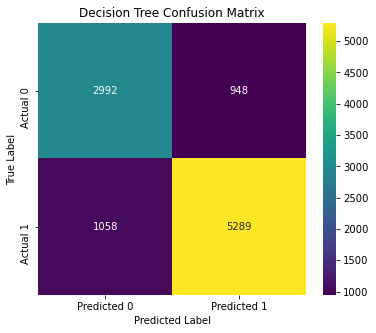

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix

# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train_transformed, y_train_transformed)

# Make predictions
y_pred_dt = dt_model.predict(X_test_transformed)

# Evaluate the model
accuracy_dt = accuracy_score(y_test_transformed, y_pred_dt)
recall_dt = recall_score(y_test_transformed, y_pred_dt)
precision_dt = precision_score(y_test_transformed, y_pred_dt)
f1_dt = f1_score(y_test_transformed, y_pred_dt)

print('Model 5 - DT:')
print(f'Accuracy: {accuracy_dt:.4f}')
print(f'Recall: {recall_dt:.4f}')
print(f'Precision: {precision_dt:.4f}')
print(f'F1-score: {f1_dt:.4f}')
print(classification_report(y_test_transformed, y_pred_dt))

# Plot confusion matrix
cm_dt = confusion_matrix(y_test_transformed, y_pred_dt)
plt.figure(figsize=(6,5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='viridis',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Model 6 - DT Optm:
Accuracy: 0.8161
Recall: 0.8914
Precision: 0.8247
F1-score: 0.8568
              precision    recall  f1-score   support

         0.0       0.80      0.69      0.74      3940
         1.0       0.82      0.89      0.86      6347

    accuracy                           0.82     10287
   macro avg       0.81      0.79      0.80     10287
weighted avg       0.81      0.82      0.81     10287



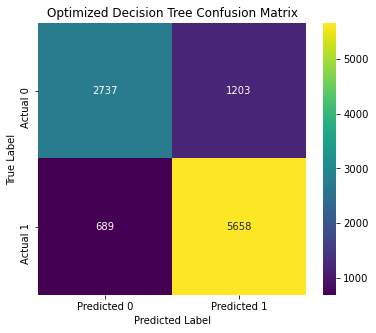

In [ ]:
# Hyperparameter tuning using GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix

# Define the model
dt = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
#     (None allows the model to find the best depth on its own)
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_transformed, y_train_transformed)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Train the model with the best hyperparameters
# (Using 2 asterisks to unpack the best params disctionary)
best_dt = DecisionTreeClassifier(**best_params, random_state=42)
best_dt.fit(X_train_transformed, y_train_transformed)

# Make predictions
y_pred_best_dt = best_dt.predict(X_test_transformed)

# Evaluate the optimized model
accuracy_dt_optm = accuracy_score(y_test_transformed, y_pred_best_dt)
recall_dt_optm = recall_score(y_test_transformed, y_pred_best_dt)
precision_dt_optm = precision_score(y_test_transformed, y_pred_best_dt)
f1_dt_optm = f1_score(y_test_transformed, y_pred_best_dt)

print('Model 6 - DT Optm:')
print(f'Accuracy: {accuracy_dt_optm:.4f}')
print(f'Recall: {recall_dt_optm:.4f}')
print(f'Precision: {precision_dt_optm:.4f}')
print(f'F1-score: {f1_dt_optm:.4f}')
print(classification_report(y_test_transformed, y_pred_best_dt))

# Plot confusion matrix
cm_best_dt = confusion_matrix(y_test_transformed, y_pred_best_dt)
plt.figure(figsize=(6,5))
sns.heatmap(cm_best_dt, annot=True, fmt='d', cmap='viridis',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Optimized Decision Tree Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Model 6 shows improved recall (0.8914 vs. 0.8333) and a slightly better F1-score (0.8568 vs. 0.8406) compared to model 5. However, the precision is slightly lower (0.8247 vs. 0.8480), likely due to the model favoring recall over precision. The hyperparameter tuning resulted in a minor boost in accuracy (0.8161 vs. 0.8050), indicating a better balance in classification performance.
While decision trees offer interpretability, they may still be prone to overfitting, prompting the need to explore K-Nearest Neighbors (KNN), which takes a different approach by classifying data points based on their proximity to neighbors, making it more flexible but potentially sensitive to noisy data.

### K-NN

Model 7 - K-NN:
Accuracy: 0.8176
Recall: 0.8809
Precision: 0.8331
F1-score: 0.8563
              precision    recall  f1-score   support

         0.0       0.79      0.72      0.75      3940
         1.0       0.83      0.88      0.86      6347

    accuracy                           0.82     10287
   macro avg       0.81      0.80      0.80     10287
weighted avg       0.82      0.82      0.82     10287



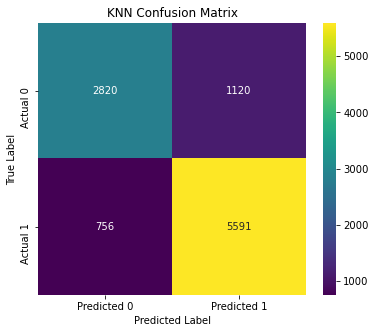

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix

# Initialize KNN model with a default value of k
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_transformed, y_train_transformed)

# Make predictions
y_pred_knn = knn.predict(X_test_transformed)

# Evaluate the model
accuracy_knn = accuracy_score(y_test_transformed, y_pred_knn)
recall_knn = recall_score(y_test_transformed, y_pred_knn)
precision_knn = precision_score(y_test_transformed, y_pred_knn)
f1_knn = f1_score(y_test_transformed, y_pred_knn)

print('Model 7 - K-NN:')
print(f'Accuracy: {accuracy_knn:.4f}')
print(f'Recall: {recall_knn:.4f}')
print(f'Precision: {precision_knn:.4f}')
print(f'F1-score: {f1_knn:.4f}')
print(classification_report(y_test_transformed, y_pred_knn))

# Plot confusion matrix
cm_knn = confusion_matrix(y_test_transformed, y_pred_knn)
plt.figure(figsize=(6,5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='viridis',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Improving the model by hyperparameter tuning.

Best k value: 5
Model 8 - K-NN Optm:
Accuracy: 0.8176
Recall: 0.8809
Precision: 0.8331
F1-score: 0.8563
              precision    recall  f1-score   support

         0.0       0.79      0.72      0.75      3940
         1.0       0.83      0.88      0.86      6347

    accuracy                           0.82     10287
   macro avg       0.81      0.80      0.80     10287
weighted avg       0.82      0.82      0.82     10287



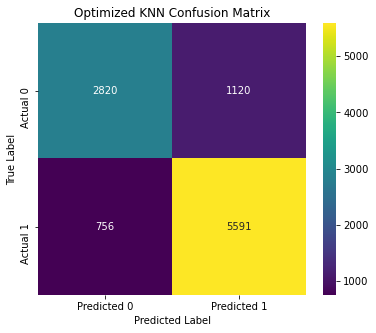

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid (testing odd values of k to avoid ties)
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15]}

# Perform Grid Search
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search_knn.fit(X_train_transformed, y_train_transformed)

# Get the best k value
best_k = grid_search_knn.best_params_['n_neighbors']
print(f'Best k value: {best_k}')

# Train KNN with the best k
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_transformed, y_train_transformed)

# Make predictions
y_pred_best_knn = best_knn.predict(X_test_transformed)

# Evaluate the optimized model
accuracy_knn_optm = accuracy_score(y_test_transformed, y_pred_best_knn)
recall_knn_optm = recall_score(y_test_transformed, y_pred_best_knn)
precision_knn_optm = precision_score(y_test_transformed, y_pred_best_knn)
f1_knn_optm = f1_score(y_test_transformed, y_pred_best_knn)

print('Model 8 - K-NN Optm:')
print(f'Accuracy: {accuracy_knn_optm:.4f}')
print(f'Recall: {recall_knn_optm:.4f}')
print(f'Precision: {precision_knn_optm:.4f}')
print(f'F1-score: {f1_knn_optm:.4f}')
print(classification_report(y_test_transformed, y_pred_best_knn))

# Plot confusion matrix
cm_best_knn = confusion_matrix(y_test_transformed, y_pred_best_knn)
plt.figure(figsize=(6,5))
sns.heatmap(cm_best_knn, annot=True, fmt='d', cmap='viridis',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Optimized KNN Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Both K-NN models performed similarly indicating that optimizing k had minimal impact on performance.

## EVALUATION

In [ ]:
# Store model performance
model_results = pd.DataFrame({
    'Model': ['Logistic Regression','Logistic Regression (Optimized)','Random Forest','Random Forest (Optimized)','Decision Tree','Decision Tree (Optimized)','KNN','KNN (Optimized)'],
    'Accuracy': [accuracy_logreg, accuracy_logreg_optm, accuracy_rf,  accuracy_rf_optm, accuracy_dt, accuracy_dt_optm, accuracy_knn, accuracy_knn_optm],
    'Precision': [precision_logreg, precision_logreg_optm, precision_rf,  precision_rf_optm, precision_dt, precision_dt_optm, precision_knn, precision_knn_optm ],
    'Recall': [recall_logreg, recall_logreg_optm, recall_rf,  recall_rf_optm, recall_dt, recall_dt_optm, recall_knn, recall_knn_optm ],
    'F1-score': [f1_logreg, f1_logreg_optm, f1_rf,  f1_rf_optm, f1_dt, f1_dt_optm, f1_knn, f1_knn_optm ]
})

# Display comparison table
print(model_results)


                             Model  Accuracy  Precision    Recall  F1-score
0              Logistic Regression  0.755419   0.795010  0.813298  0.804050
1  Logistic Regression (Optimized)  0.757947   0.767661  0.871435  0.816263
2                    Random Forest  0.846505   0.861212  0.895541  0.878041
3        Random Forest (Optimized)  0.853796   0.851707  0.923901  0.886336
4                    Decision Tree  0.804997   0.848004  0.833307  0.840591
5        Decision Tree (Optimized)  0.816079   0.824661  0.891445  0.856753
6                              KNN  0.817634   0.833110  0.880889  0.856333
7                  KNN (Optimized)  0.817634   0.833110  0.880889  0.856333


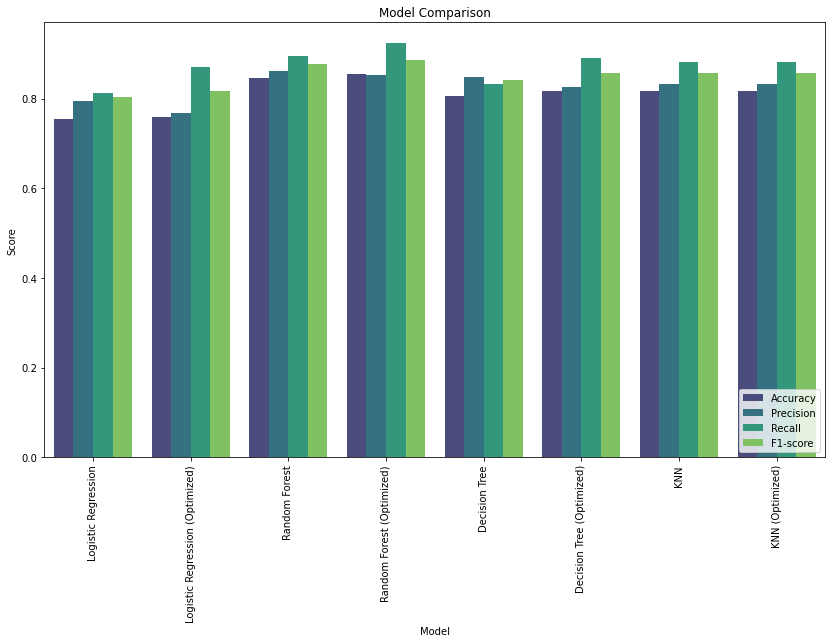

In [ ]:
# Bar plot for accuracy, precision, recall and F1 score
# Set figure size
plt.figure(figsize=(14, 8))

# Melt data for easier plotting
model_results_melted = model_results.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot
sns.barplot(x='Model', y='Score', hue='Metric', data=model_results_melted, palette='viridis')
plt.xticks(rotation=90)
plt.title('Model Comparison')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.show()


Each of the above models has been evaluated on how well it predicts whether or not a well is functional. From the bar chart above, we can make the following deductions:

1. Optimized models generally outperform their baseline counterparts. This suggests that tuning helped refine decision boundaries and improve model performance.  

2. Random Forest (Optimized) performs best overall. It has the highest Recall, which indicates that it effectively identifies wells that are functional or non-functional. High Precision and F1-score also suggest a good balance between correctly identifying functional wells and minimizing false positives.  

3. Decision Tree and KNN perform similarly, but not as well as Random Forest.Both models have comparable Accuracy and F1-score but slightly lower Recall than Random Forest. This suggests that while they are effective classifiers, they may misclassify some wells.  

4. Logistic Regression has the lowest performance. Logistic Regression, both baseline and optimized, has the lowest scores, especially in Recall. This indicates that it struggles with capturing complex patterns in the dataset, likely due to its linear nature.  

Well functionality is likely a complex classification problem requiring non-linear decision boundaries, as Random Forest and Decision Tree models outperform Logistic Regression. Recall is crucial in this context missing out on non-functional wells could mean leaving defective or broken wells in use, leading to water supply issues.  
Random Forest is the best choice if the goal is to maximize predictive performance and correctly classify as many wells as possible. This model will help identify which wells are non - functional for the sake of planning for repairs.

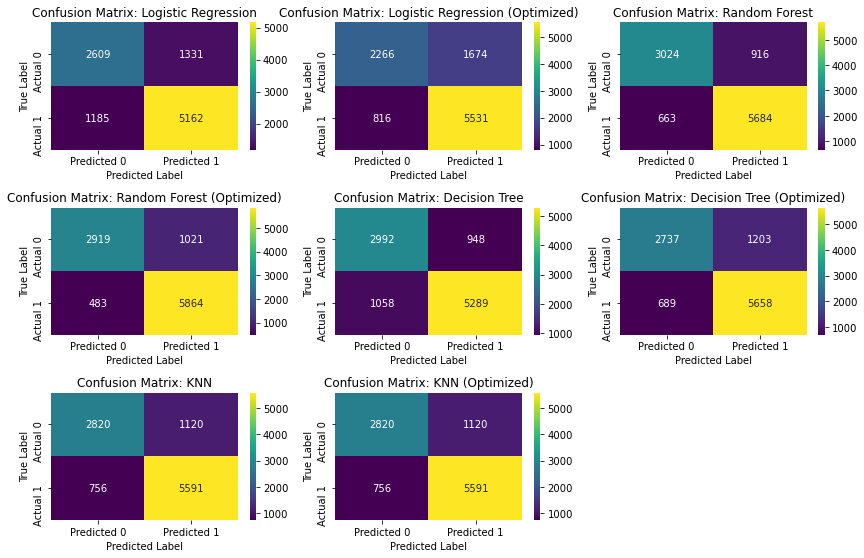

In [ ]:
# Comparison of the confusion matrices for the various models.
from sklearn.metrics import confusion_matrix

models = ['Logistic Regression','Logistic Regression (Optimized)','Random Forest','Random Forest (Optimized)','Decision Tree','Decision Tree (Optimized)','KNN','KNN (Optimized)']
y_preds = [y_pred_logreg, y_pred, y_pred_rf, y_pred_optimized, y_pred_dt, y_pred_best_dt, y_pred_knn, y_pred_best_knn]

plt.figure(figsize=(12, 10))

for i, (model, y_pred) in enumerate(zip(models, y_preds)):
    cm = confusion_matrix(y_test_transformed, y_pred)

    plt.subplot(4, 3, i + 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis',
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix: {model}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

plt.tight_layout()
plt.show()


Before analysing, let us first take note of the following:
1. Misclassifying a non-functional well as functional could result in communities relying on a faulty water source.
2. If a functional well is misclassified as non-functional, it may lead to unnecessary repairs or neglect.

Random Forest (Optimized) is the most reliable model, making it the best choice for minimizing misclassifications.

It has the lowest false negatives (483) and false positives (1021) compared to other models.
It correctly classifies most functional wells (5864 True Positives) and non-functional wells (2919 True Negatives).
This suggests that it is the most reliable model for predicting well functionality.

Decision Tree and KNN models perform well also but have higher false negatives. Logistic Regression struggles with classification.

## CONCLUSIONS
From our analysis, we have concluded the following in line with our objectives:

**1. What factors contribute most to well failures?**
From linear regression and recursive feature elimination, 'quantity', 'waterpoint_type', 'source', 'construction_year', 'payment_type' and 'management_group' stand out as the leading predictors to the functionality of a well.

**2. Which regions have the highest concentration of non-functional wells?**
The geopandas plot has clearly identified a high cluster of non-functional wells in the south east of Tanzania. The government should consider allocating resources towards repair and maintenance in this area, to ensure the residents get good water supply.

**3. How does the construction year affect well failure rates?**
From the line plot, it is clear that more recent wells are more likely to be functional, suggesting improvements in construction quality, materials, and maintenance programs. However, the presence of non-functional wells in all time periods highlights that factors beyond age also play a role in well performance.

### MODELING EVALUATION SUMMARY
After modeling a logistic regression, random forest, decision tree, K-NN and their relative optimised models, **The Optimised Random Forest model** stands out as the best performing model with an accuracy-85.38%, recall-92.39%, precision-85.17% and F1-score-88.63%.
The best parameters after tuning are max_depth: 20, min_samples_leaf: 1, min_samples_split: 5, and n_estimators: 300.

## RECOMMENDATIONS
Further Recommendations for Improvement include:

1. Deeper Analysis of Key Features - Once the most influential factors affecting well functionality are identified, analyze their impact—do they contribute positively or negatively? Understanding these relationships will help the government of Tanzania make informed investment decisions to enhance well longevity.  

2. Feature Engineering for Better Insights - Instead of using construction year as a standalone feature, create a new variable, *"well age"*, to better capture the patterns related to functionality. This could improve the model's ability to detect trends over time.  

3. Utilization of Test Dataset - Since the Test Dataset; loaded earlier in the data understanding stage; was originally part of the dataset, explore ways to incorporate it during deployment or further analysis. Given that it lacks the target variable, consider leveraging it for validation, unsupervised learning, or as input for semi-supervised techniques.

4. The model could be further analysed as a ternary classification problem to include the 'functional but needs repair' as a category on its own. This will help the client be able to plan for maintenance early enough before the well condition deteriorates to the 'non-functional' category.
